# data_description.ipynb
This notebook provides some basic information about the analysed population such as the number of patients who had HbA1c tests within the timeframe of interest (Jan 2019 to Jun 2021), breakdown by diabetes status, and distribution of HbA1c values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

## Data Import

In [2]:
# Read in input files
li = []

for file in glob('../output/data/input*.csv'):
    if file.split('_')[1] not in ['ethnicity.csv']:
        df_temp = pd.read_csv(file)
        df_temp['date'] = file[21:-4]
        li.append(df_temp)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)

In [3]:
# Segment the data by diabetes status
df_t1dm = df_input.loc[df_input.diabetes_type == 'T1DM']
df_t2dm = df_input.loc[df_input.diabetes_type == 'T2DM']

In [4]:
# Subset by thresholds
def thresholds(limit):
    return df_t2dm.loc[df_t2dm.hba1c_mmol_per_mol > limit]

In [5]:
# Segment the data by threshold
df_gt48 = thresholds(48)
df_gt58 = thresholds(58)
df_gt64 = thresholds(64)
df_gt75 = thresholds(75)

## Distribution of HbA1c

In [6]:
# Display distribution
def show_hist(df_in, title):
    print(title)
    plt.hist(df_in.hba1c_mmol_per_mol, bins = 20)
    plt.show()

All Patients


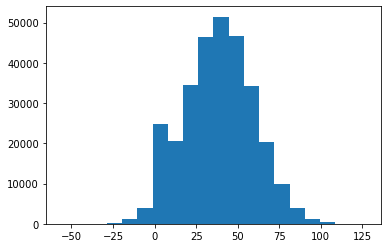

Patients with T2DM & HbA1c > 48


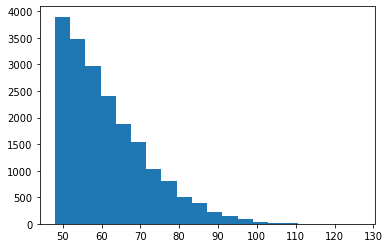

Patients with T2DM & HbA1c > 58


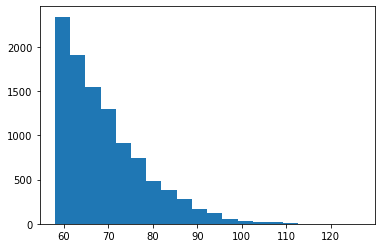

Patients with T2DM & HbA1c > 64


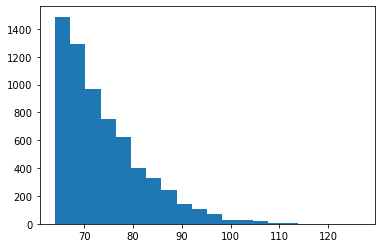

Patients with T2DM & HbA1c > 75


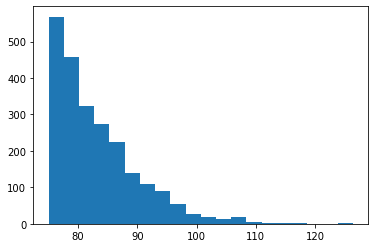

In [7]:
# Full distribution
show_hist(df_input, "All Patients")

# >48
show_hist(df_gt48, "Patients with T2DM & HbA1c > 48")

# >58
show_hist(df_gt58, "Patients with T2DM & HbA1c > 58")

# >64
show_hist(df_gt64, "Patients with T2DM & HbA1c > 64")

# >75
show_hist(df_gt75, "Patients with T2DM & HbA1c > 75")

## Descriptive Statistics

In [8]:
def unique_pat(df_in):
    return len(df_in.patient_id.unique())

In [9]:
# Total number of patients who were given an HbA1c test between Jan 2019 and Jun 2021
num_total = unique_pat(df_input)

# T1DM patients
num_t1dm = unique_pat(df_t1dm)

# T2DM patients
num_t2dm = unique_pat(df_t2dm)

print("Total patients: {}\nT1DM patients: {}\nT2DM patients: {}".format(num_total, num_t1dm, num_t2dm))

Total patients: 95703
T1DM patients: 8728
T2DM patients: 45562


In [10]:
# Segment T2DM patients by thresholds 

# >48
num_gt48 = unique_pat(df_gt48)

# >58 
num_gt58 = unique_pat(df_gt58)

# >64
num_gt64 = unique_pat(df_gt64)

# >75
num_gt75 = unique_pat(df_gt75)

print(
    "T2DM & HbA1c > 48: {}\nT2DM & HbA1c > 58: {}\nT2DM & HbA1c > 64: {}\nT2DM & HbA1c > 75: {}".format(
        num_gt48, num_gt58, num_gt64, num_gt75)
)

T2DM & HbA1c > 48: 17771
T2DM & HbA1c > 58: 9785
T2DM & HbA1c > 64: 6326
T2DM & HbA1c > 75: 2296
